In [2]:
# importing of NetCDF files
import netCDF4

# plotting and data visualisations
from matplotlib import pyplot as plt

# n-dimensional arrays
import numpy as np

# high level functions for working with NetCDF files
import xarray as xr

# add colour labels to plot
import matplotlib.patches as mpatches

In [3]:
# load NetCDF file into variable - using xarray open dataset function
# if using jupyter, make sure NetCDF files are in same directory
ds1 = xr.open_dataset('ERA5_10mUwindanalysis_2008.nc')
ds2 = xr.open_dataset('ERA5_10mVwindanalysis_2008.nc')

# calculate windspeed
ds12 = ds1
ds12['uv10'] = (ds1['u10']**2 + ds2['v10']**2)**(1/2)

# get daily average
daily_data12 = ds12.groupby('time.hour').mean('time')

In [4]:
# select a grid location (lon/lat)
dsloc12 = daily_data12.sel(longitude=14,latitude=40,method='nearest')

Text(0.5,1,'Day Average, Jan 2008 (40°N, 14°E)')

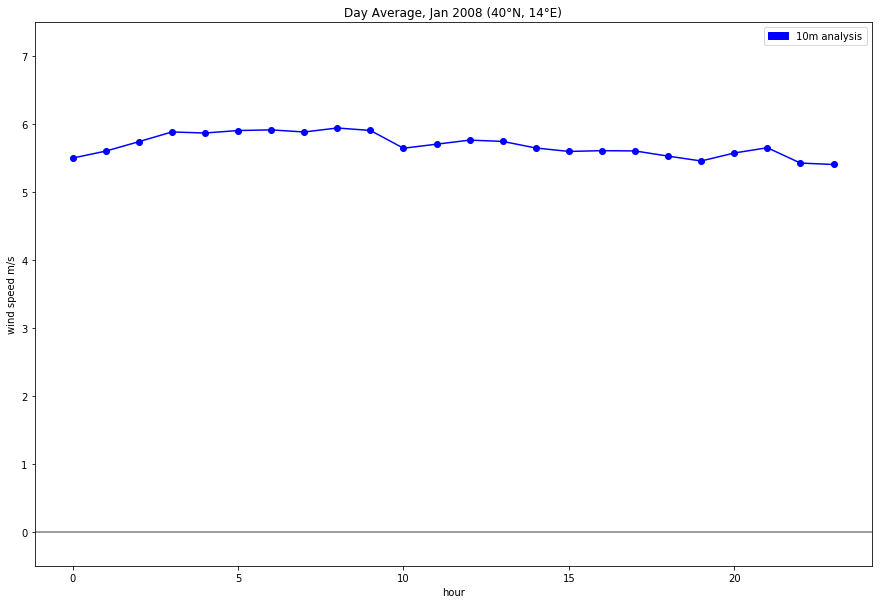

In [5]:
# plot time series
dsloc12['uv10'].plot.line('o-',color='blue',figsize=(15,10))

# change y axis to show zero reference and difference plot
plt.ylim((-0.5,7.5))

# plot zero reference line
plt.axhline(0, color='grey')

# add colour reference
blue_patch = mpatches.Patch(color='blue', label='10m analysis')
plt.legend(handles=[blue_patch,])

# add titles
plt.ylabel('wind speed m/s')
plt.title('Day Average, Jan 2008 (40°N, 14°E)')